In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv(r"D:\prakash\Smart_Premium_New\playground-series-s4e12 (3)\train.csv")

In [3]:
df_train.shape

(1200000, 21)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [5]:
df_train.head(5)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [6]:
for col in df_train.columns:
    print(f"Column: {col}")
    print(df_train[col].unique())
    print("-" * 50)


Column: id
[      0       1       2 ... 1199997 1199998 1199999]
--------------------------------------------------
Column: Age
[19. 39. 23. 21. 29. 41. 48. 44. 56. 25. 40. 18. 59. 34. 22. 46. 49. 42.
 43. 64. 52. 37. 58. 50. 35. 61. 31. 54. 45. 30. 33. 28. 62. 53. 47. 27.
 nan 38. 63. 32. 36. 20. 51. 55. 57. 24. 60. 26.]
--------------------------------------------------
Column: Gender
['Female' 'Male']
--------------------------------------------------
Column: Annual Income
[ 10049.  31678.  25602. ... 125361. 137940.  40368.]
--------------------------------------------------
Column: Marital Status
['Married' 'Divorced' 'Single' nan]
--------------------------------------------------
Column: Number of Dependents
[ 1.  3.  2.  0.  4. nan]
--------------------------------------------------
Column: Education Level
["Bachelor's" "Master's" 'High School' 'PhD']
--------------------------------------------------
Column: Occupation
['Self-Employed' nan 'Employed' 'Unemployed']
------------

In [7]:
df_train.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

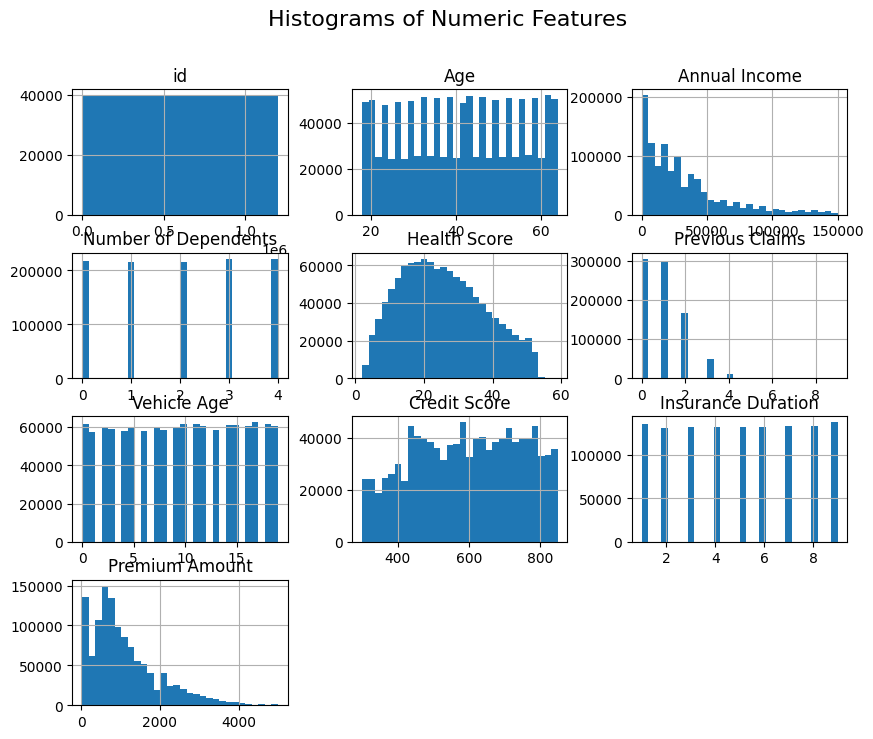

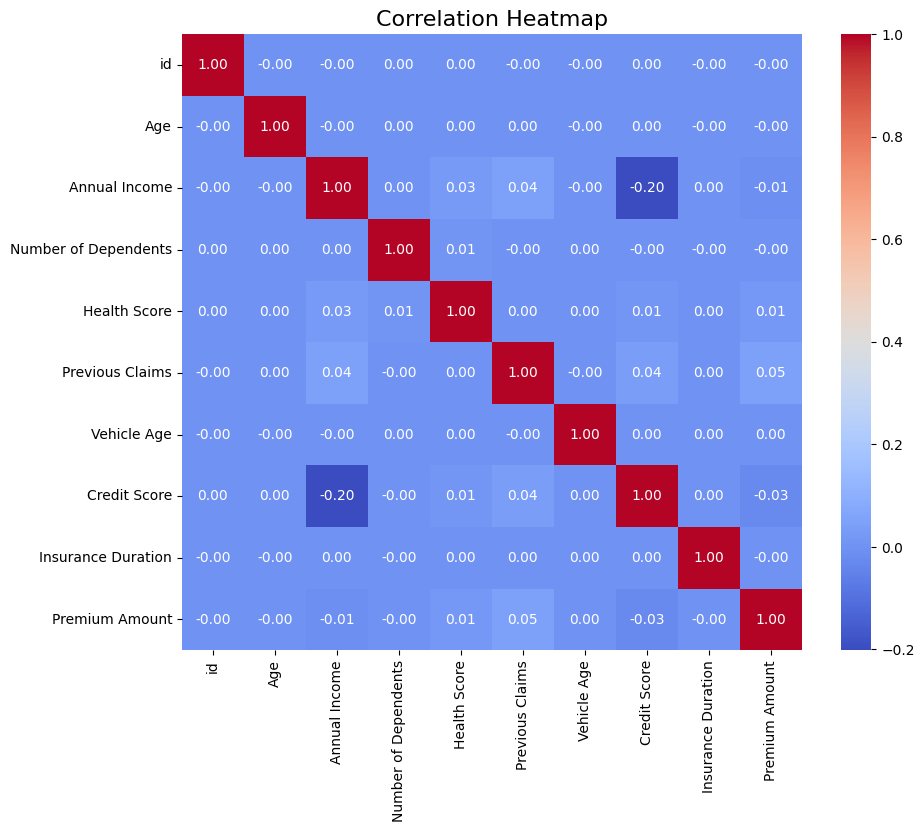

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select only numeric columns
numeric_df = df_train.select_dtypes(include=['number'])

# Histogram for numeric columns
numeric_df.hist(figsize=(10, 8), bins=30)
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [3]:
import pandas as pd

# For numerical columns → replace missing values with median
num_cols = df_train.select_dtypes(include=['number']).columns
df_train[num_cols] = df_train[num_cols].fillna(df_train[num_cols].median())

# For categorical columns → replace missing values with mode (most frequent value)
cat_cols = df_train.select_dtypes(exclude=['number']).columns
df_train[cat_cols] = df_train[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

print("✅ Missing values handled successfully!")


✅ Missing values handled successfully!


In [4]:
df_train.isnull().sum()

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64

In [5]:
df_train = df_train.drop(columns=['id'])


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1200000 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1200000 non-null  float64
 3   Marital Status        1200000 non-null  object 
 4   Number of Dependents  1200000 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            1200000 non-null  object 
 7   Health Score          1200000 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       1200000 non-null  float64
 11  Vehicle Age           1200000 non-null  float64
 12  Credit Score          1200000 non-null  float64
 13  Insurance Duration    1200000 non-null  float64
 14  Policy Start Date     1200000 non-

In [6]:
df_train['Policy Start Date'] = pd.to_datetime(df_train['Policy Start Date'], errors='coerce')


In [7]:
df_train['Policy_Year'] = df_train['Policy Start Date'].dt.year
df_train['Policy_Month'] = df_train['Policy Start Date'].dt.month
df_train['Policy_Day'] = df_train['Policy Start Date'].dt.day


In [8]:
df_train = df_train.drop(columns=['Policy Start Date'])


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1200000 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1200000 non-null  float64
 3   Marital Status        1200000 non-null  object 
 4   Number of Dependents  1200000 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            1200000 non-null  object 
 7   Health Score          1200000 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       1200000 non-null  float64
 11  Vehicle Age           1200000 non-null  float64
 12  Credit Score          1200000 non-null  float64
 13  Insurance Duration    1200000 non-null  float64
 14  Customer Feedback     1200000 non-

In [9]:
df_train.duplicated().sum()

np.int64(0)

In [10]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
cat_cols = df_train.select_dtypes(include=['object']).columns

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in cat_cols:
    df_train[col] = le.fit_transform(df_train[col])

print("✅ All categorical columns encoded successfully!")
print("Encoded columns:", list(cat_cols))


✅ All categorical columns encoded successfully!
Encoded columns: ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']


In [12]:
df_train.head(5)

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,...,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Policy_Year,Policy_Month,Policy_Day
0,19.0,0,10049.0,1,1.0,0,1,22.598761,2,2,...,372.0,5.0,2,0,3,2,2869.0,2023,12,23
1,39.0,0,31678.0,0,3.0,2,0,15.569731,0,1,...,694.0,2.0,0,1,1,2,1483.0,2023,6,12
2,23.0,1,25602.0,0,3.0,1,1,47.177549,1,2,...,595.0,3.0,1,1,3,2,567.0,2023,9,30
3,21.0,1,141855.0,1,2.0,0,0,10.938144,0,0,...,367.0,1.0,2,1,0,0,765.0,2024,6,12
4,21.0,1,39651.0,2,1.0,0,1,20.376094,0,2,...,598.0,4.0,2,1,3,2,2022.0,2021,12,1


In [13]:
import pandas as pd

# Select only numeric columns
num_cols = df_train.select_dtypes(include=['number']).columns

# Loop through each numeric column
for col in num_cols:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)]

    print(f"{col}: {len(outliers)} outliers")


Age: 0 outliers
Gender: 0 outliers
Annual Income: 70466 outliers
Marital Status: 0 outliers
Number of Dependents: 0 outliers
Education Level: 0 outliers
Occupation: 0 outliers
Health Score: 0 outliers
Location: 0 outliers
Policy Type: 0 outliers
Previous Claims: 62066 outliers
Vehicle Age: 0 outliers
Credit Score: 0 outliers
Insurance Duration: 0 outliers
Customer Feedback: 0 outliers
Smoking Status: 0 outliers
Exercise Frequency: 0 outliers
Property Type: 0 outliers
Premium Amount: 49320 outliers
Policy_Year: 0 outliers
Policy_Month: 0 outliers
Policy_Day: 0 outliers


In [11]:
import numpy as np

# List of columns with outliers
cols_with_outliers = ['Annual Income', 'Previous Claims']

# Apply log(1 + x) transform to handle zeros safely
for col in cols_with_outliers:
    df_train[col] = np.log1p(df_train[col])

print("✅ Log transformation applied to outlier columns successfully!")


✅ Log transformation applied to outlier columns successfully!


In [12]:
import pandas as pd

# Select only numeric columns
num_cols = df_train.select_dtypes(include=['number']).columns

# Loop through each numeric column
for col in num_cols:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)]

    print(f"{col}: {len(outliers)} outliers")


Age: 0 outliers
Gender: 0 outliers
Annual Income: 30159 outliers
Marital Status: 0 outliers
Number of Dependents: 0 outliers
Education Level: 0 outliers
Occupation: 0 outliers
Health Score: 0 outliers
Location: 0 outliers
Policy Type: 0 outliers
Previous Claims: 2387 outliers
Vehicle Age: 0 outliers
Credit Score: 0 outliers
Insurance Duration: 0 outliers
Customer Feedback: 0 outliers
Smoking Status: 0 outliers
Exercise Frequency: 0 outliers
Property Type: 0 outliers
Premium Amount: 49320 outliers
Policy_Year: 0 outliers
Policy_Month: 0 outliers
Policy_Day: 0 outliers


In [13]:
# Check skewness and kurtosis for numeric columns
num_cols = df_train.select_dtypes(include=['number']).columns

skew_kurt_list = []

for col in num_cols:
    skewness = df_train[col].skew()
    kurt = df_train[col].kurtosis()
    skew_kurt_list.append({
        'Column': col,
        'Skewness': round(skewness, 2),
        'Kurtosis': round(kurt, 2)
    })

# Display as a DataFrame
import pandas as pd
skew_kurt_df = pd.DataFrame(skew_kurt_list)
print(skew_kurt_df)


                  Column  Skewness  Kurtosis
0                    Age     -0.01     -1.17
1                 Gender     -0.01     -2.00
2          Annual Income     -1.05      1.43
3         Marital Status     -0.03     -1.51
4   Number of Dependents     -0.01     -1.14
5        Education Level     -0.02     -1.37
6             Occupation      0.61     -1.25
7           Health Score      0.31     -0.63
8               Location      0.01     -1.50
9            Policy Type     -0.01     -1.50
10       Previous Claims     -0.15     -0.48
11           Vehicle Age     -0.02     -1.21
12          Credit Score     -0.13     -0.84
13    Insurance Duration     -0.01     -1.24
14     Customer Feedback      0.13     -1.54
15        Smoking Status     -0.01     -2.00
16    Exercise Frequency     -0.02     -1.36
17         Property Type     -0.00     -1.50
18        Premium Amount      1.24      1.52
19           Policy_Year     -0.01     -1.04
20          Policy_Month      0.01     -1.21
21        

In [14]:
df_train.to_csv("preprocessed.csv", index=False)
print("✅ Preprocessed data saved successfully as 'preprocessed.csv'")


✅ Preprocessed data saved successfully as 'preprocessed.csv'


In [ ]:
from sklearn.model_selection import train_test_split


X = df_train.drop(columns=['Premium Amount'])
y = df_train['Premium Amount']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      
    random_state=42     
)

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

lr_model = LinearRegression()

# Training the model on scaled training data
lr_model.fit(X_train_scaled, y_train)

# Make predictions on scaled test data
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("✅ Linear Regression Model Results:")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


✅ Linear Regression Model Results:
Root Mean Squared Error (RMSE): 863.1950
Mean Absolute Error (MAE): 667.2987
R² Score: 0.0029


In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the Decision Tree model with hyperparameters to prevent overfitting
dt_model = DecisionTreeRegressor(
    max_depth=10,            # Limit tree depth
    min_samples_split=20,    # Minimum samples required to split a node
    min_samples_leaf=10,     # Minimum samples required in a leaf node
    random_state=42
)

# Train the model on original (unscaled) training data
dt_model.fit(X_train, y_train)

# Make predictions on original (unscaled) test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae = mean_absolute_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

print("✅ Decision Tree Regression Model Results:")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


✅ Decision Tree Regression Model Results:
Root Mean Squared Error (RMSE): 845.1506
Mean Absolute Error (MAE): 638.6656
R² Score: 0.0442


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


rf_model = RandomForestRegressor(
    n_estimators=100,        # Number of trees in the forest
    max_depth=10,            # Maximum depth of each tree
    min_samples_split=20,    # Minimum samples required to split a node
    min_samples_leaf=10,     # Minimum samples required in a leaf node
    random_state=42,
    n_jobs=-1                # Use all CPU cores for faster training
)

# Train the model on original (unscaled) training data
rf_model.fit(X_train, y_train)

# Make predictions on original (unscaled) test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print("✅ Random Forest Regression Model Results:")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


✅ Random Forest Regression Model Results:
Root Mean Squared Error (RMSE): 842.3776
Mean Absolute Error (MAE): 637.1413
R² Score: 0.0504


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

xgb_model = XGBRegressor(
    n_estimators=200,        # Number of boosting rounds (trees)
    learning_rate=0.05,      # Step size shrinkage
    max_depth=10,            # Maximum depth of each tree
    subsample=0.8,           # Randomly sample 80% of data for each tree
    colsample_bytree=0.8,    # Use 80% of features per tree
    reg_lambda=1.0,          # L2 regularization
    random_state=42,
    n_jobs=-1,               # Use all CPU cores
    verbosity=0              # Suppress training logs
)

# Train the model on original (unscaled) training data
xgb_model.fit(X_train, y_train)

# Make predictions on original (unscaled) test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print("✅ XGBoost Regression Model Results:")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


✅ XGBoost Regression Model Results:
Root Mean Squared Error (RMSE): 843.7329
Mean Absolute Error (MAE): 640.1623
R² Score: 0.0474
